# SVM Support Vector Machine (Метод опорных векторов)

Применение алгоритма SVM для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$.

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см
3. ширина лепестка, см

Метки классов

0. Setosa
1. Versicolour
2. Virginica

## 0. Импорт библиотек

In [32]:
# программная реализация алгоритма SVM для классификации
from sklearn.svm import SVC
# программная реализация расчета метрики точности
from sklearn.metrics import accuracy_score
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модуль, позволяющий подтягивать данные по хрестоматийным примерам для ML
from sklearn import datasets

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt

# Библиотеки для работы с векторами и таблицыми данных
import pandas as pd
import numpy as np

# Модуль для нормализации данных
from sklearn.preprocessing import normalize

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке scikit-learn модулем datasets

In [33]:
iris = datasets.load_iris()

In [34]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
# Информация по признакам
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
# Информация по целевой переменной (классам цветка)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
iris.target.shape

(150,)

In [38]:
# Выведем информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print('Размерность признакового пространства {}'.format(iris.data.shape))
print('Размерность вектора целевой переменной {}'.format(iris.target.shape))

Размерность признакового пространства (150, 4)
Размерность вектора целевой переменной (150,)


In [39]:
# Вынесем признаки и целевую перемнную в отдельные переменные
X = iris.data[:, :4]
y = iris.target

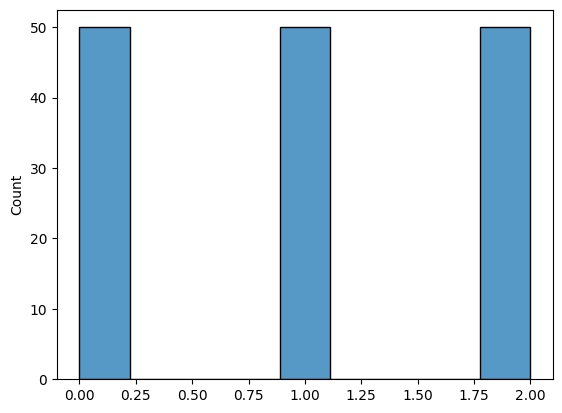

In [40]:
# Посмотрим на гистограмму распределения целевой переменной
sns.histplot(y);

Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

In [41]:
# Создадим dataframe на основании исходных данных
# для простоты отображения графиков
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal length (cm)',
                                                               'sepal width (cm)',
                                                               'petal length (cm)',
                                                               'petal width (cm)',
                                                               'class'])

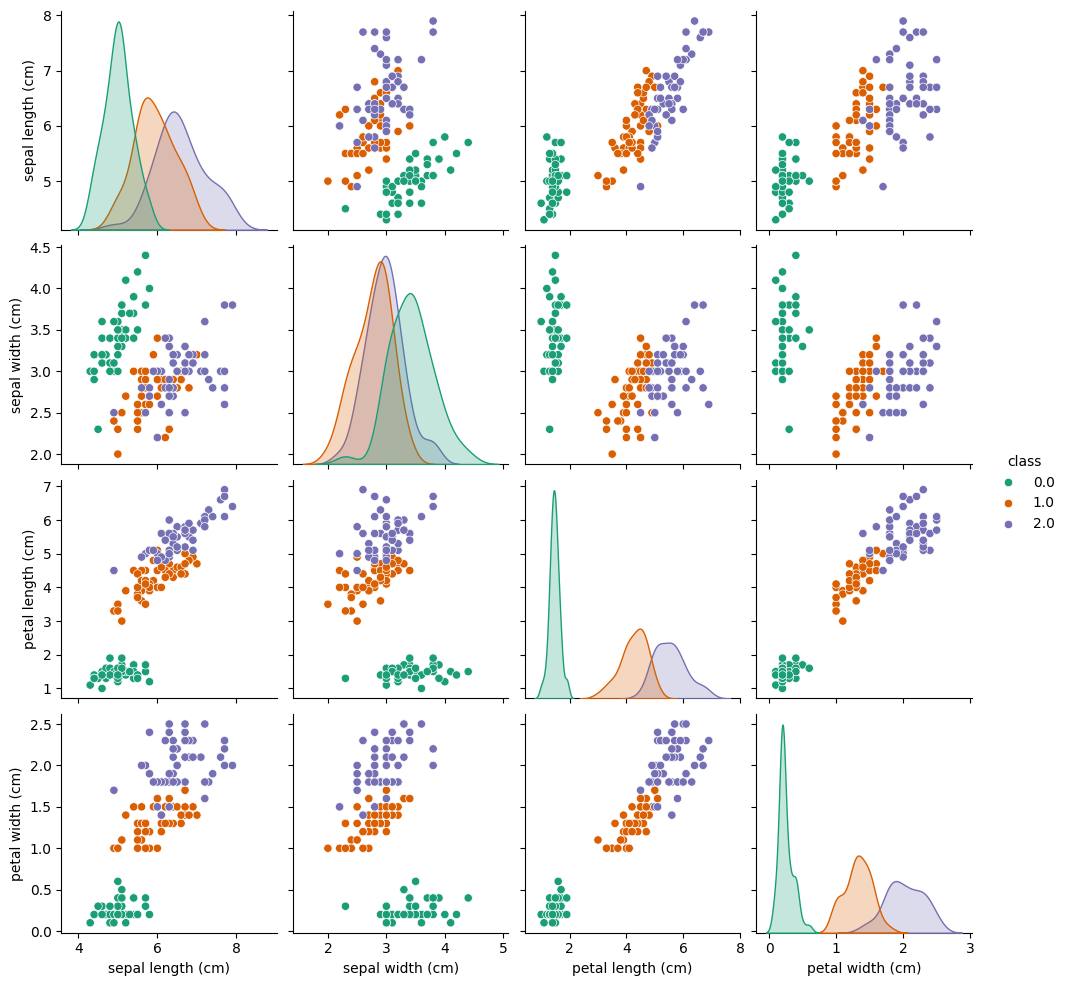

In [42]:
# При помощи модуля seaborn.pairplot визуализируем попарные зависимости данных
# На основной диагонали показаные гистограммы распределения параметров
sns.pairplot(iris_df,hue='class',palette='Dark2');

# 2. Обучение модели

Прежде чем приступить к обучению модели, предварительно создадим функцию, которая будет визуализировать границы классов на основании обученных моделей

In [43]:
def plot_contours(X_train, X_test, y_test, model):
    h = .02  # шаг сетки
    # Создадим сетку для отображения
    x_min, x_max = X_test[:, 0].min()*0.9, X_test[:, 0].max()*1.1
    y_min, y_max = X_test[:, 1].min()*0.9, X_test[:, 1].max()*1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)

    # Добавим на график точки из датасета
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.seismic)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

def print_acc(y_test, y_pred, text):
    accuracy = accuracy_score(y_test, y_pred)*100
    print(text + str(round(accuracy, 2)) + ' %.')

In [44]:
X = iris_df.drop('class', axis=1)
y = iris_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=21)

In [45]:
# Создадим объект класса SVM с параметрами по умолчанию
classifier_SVM = SVC()

# Обучение модели
classifier_SVM.fit(X_train, y_train)

# Прогноз
y_pred = classifier_SVM.predict(X_test)

In [46]:
# Посчитаем точность модели как долю верно классифицированных объектов
print_acc(y_test, y_pred, 'Точность на тестовой выборке ')

Точность на тестовой выборке 90.0 %.


## 2.1. Параметры SVM
### Ядро

**Линейное ядро**

Линейные ядра вычисляют близость во входном пространстве. Они неявно определяют трансформацию в измерения более высоких порядков. Из-за этого каждая из гиперплоскостей на рисунке выше представляет собой прямые линии.

Линейное ядро определяется как $\langle x,x' \rangle$

In [47]:
X_vis = X[['sepal length (cm)', 'sepal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size = 0.20, random_state=21)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


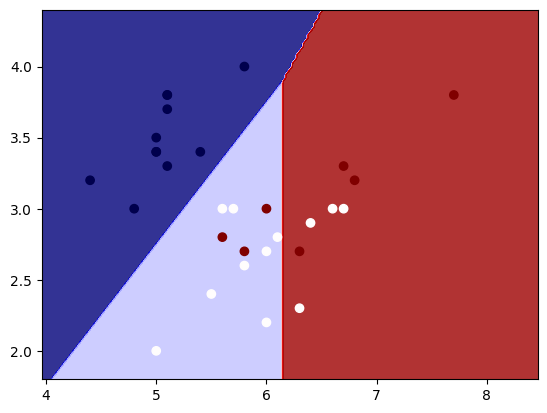

In [48]:
# Создадим объект класса SVM c линейным ядром
SVM_linear = SVC(kernel='linear')

# Обучение модели
SVM_linear.fit(X_train, y_train);

# Выведем границы классов по модели
plot_contours(X_train.values, X_test.values, y_test.values, SVM_linear)

In [49]:
# Посчитаем точность модели как долю верно классифицированных объектов
y_pred = SVM_linear.predict(X_test)
print_acc(y_test, y_pred, 'Линейное ядро. Точность на тестовой выборке ')

Линейное ядро. Точность на тестовой выборке 76.67 %.


**Полиномиальное ядро**

Линейное ядро - частный случай полиномиального, когда степень = 1.

Полиномиальное ядро определяется как $(\gamma\langle x,x' + r \rangle)^d$, где где $d$ указывается параметром `degree`, $r$ при помощи `coef0`.

Ядро полинома позволяет нам искать нелинейные паттерны в наших данных, как если бы у нас был доступ к функциям взаимодействия, которые являются результатом объединения ранее существующих функций ($a^2, b^2, ab$ и т.д.)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


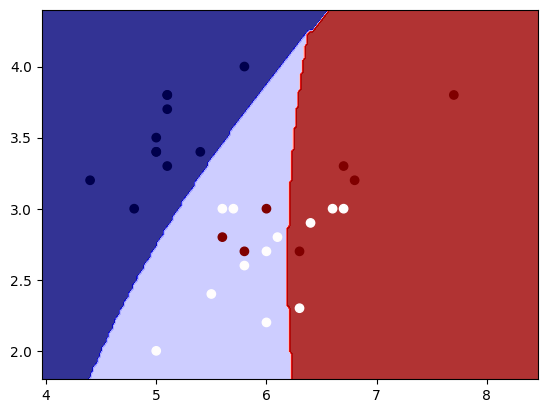

In [50]:
# Создадим объект класса SVM c полиномиальным ядром и степенью полинома 3
SVM_poly = SVC(kernel='poly', degree=3)

# Обучение модели
SVM_poly.fit(X_train, y_train);

# Выведем границы классов по модели
plot_contours(X_train.values, X_test.values, y_test.values, SVM_poly)

In [51]:
# Посчитаем точность модели как долю верно классифицированных объектов
y_pred = SVM_poly.predict(X_test)
print_acc(y_test, y_pred, 'Полиномиальное ядро. Точность на тестовой выборке ')

Полиномиальное ядро. Точность на тестовой выборке 76.67 %.


**Сигмовидное ядро**

Ядро определяется как $tanh(\gamma\langle x,x'\rangle+r)$, где $r$ указывается как `coef0`

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


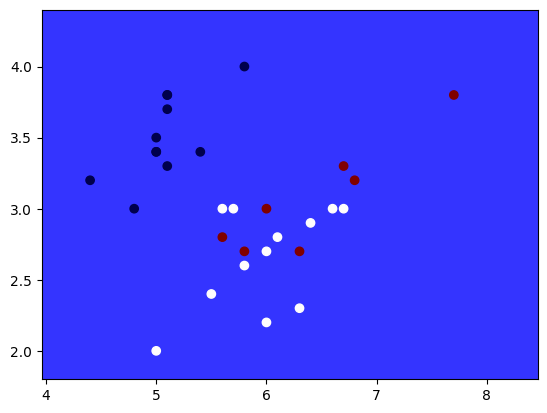

In [52]:
# Создадим объект класса SVM c сигмовидным ядром
SVM_sigmoid = SVC(kernel='sigmoid', gamma="auto")

# Обучение модели
SVM_sigmoid.fit(X_train, y_train);

# Выведем границы классов по модели
plot_contours(X_train.values, X_test.values, y_test.values, SVM_sigmoid)

In [53]:
# Посчитаем точность модели как долю верно классифицированных объектов
y_pred = SVM_sigmoid.predict(X_test)
print_acc(y_test, y_pred, 'Сигмоидальное ядро. Точность на тестовой выборке ')

Сигмоидальное ядро. Точность на тестовой выборке 23.33 %.


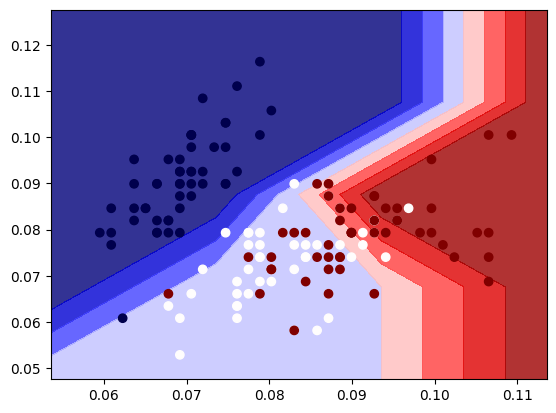

In [54]:
sepal_length_norm = normalize(X.values[:,0].reshape(1, -1))[0]
sepal_width_norm = normalize(X.values[:,1].reshape(1, -1))[0]

# Создадим объект класса SVM c сигмоидальным ядром
SVM_sigmoid_norm = SVC(kernel='sigmoid', gamma="auto")

# Обучение модели
SVM_sigmoid_norm.fit(np.c_[sepal_length_norm, sepal_width_norm], y);

# Выведем границы классов по модели
plot_contours(np.c_[sepal_length_norm, sepal_width_norm], np.c_[sepal_length_norm, sepal_width_norm], y.values, SVM_sigmoid_norm)

In [55]:
# Посчитаем точность модели как долю верно классифицированных объектов
y_pred = SVM_sigmoid_norm.predict(np.c_[sepal_length_norm, sepal_width_norm])
print_acc(y, y_pred, 'Сигмоидальное ядро. Точность на полной выборке ')

Сигмоидальное ядро. Точность на полной выборке 76.67 %.


**Радиальная базисная функция**

Ядро выглядит как $exp(-\gamma|x-x'|^2)$, где $\gamma$ указывается параметром `gamma`, должно быть строго больше 0.

При обучении `SVM` с ядром Радиальной Базовой Функции (Radial Basis Function — RBF) необходимо учитывать два параметра: `C` и gamma. Параметр `C`, общий для всех ядер `SVM`, компенсирует неправильную классификацию обучающих примеров простотой поверхности принятия решений. Низкое значение `C` делает поверхность принятия решения гладкой, а высокое `C` правильные классификации всех обучающих примеров. gamma определяет, какое влияние имеет один обучающий пример. Чем больше `gamma`, тем ближе другие примеры должны быть затронуты.

Правильный выбор `C` и `gamma` имеет решающее значение для производительности SVM. Рекомендуется использовать `GridSearchCV` с `C` и `gamma` экспоненциально далеко друг от друга, чтобы выбрать хорошие значения.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


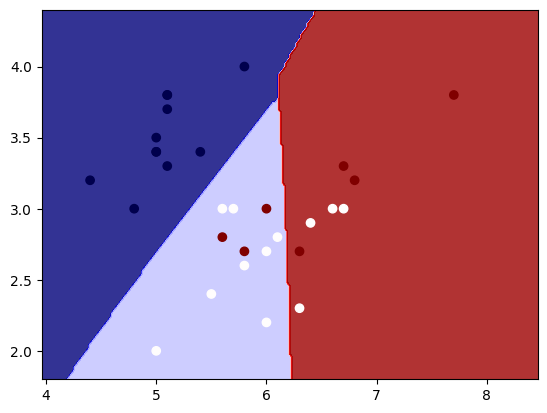

In [56]:
# Создадим объект класса SVM c РБФ ядром
SVM_RBF = SVC(kernel='rbf')

# Обучение модели
SVM_RBF.fit(X_train, y_train);

# Выведем границы классов по модели
plot_contours(X_train.values, X_test.values, y_test.values, SVM_RBF)

In [57]:
# Посчитаем точность модели как долю верно классифицированных объектов
y_pred = SVM_RBF.predict(X_test)
print_acc(y_test, y_pred, 'РБФ ядро. Точность на тестовой выборке ')

РБФ ядро. Точность на тестовой выборке 76.67 %.


### C: параметр штрафа

Как мы уже и проговорили, параметр `C` компенсирует неправильную классификацию обучающих примеров простотой поверхности принятия решений. Давайте посмотрим как будут выглядеть разделяющие гиперплоскости при разных значениях C.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


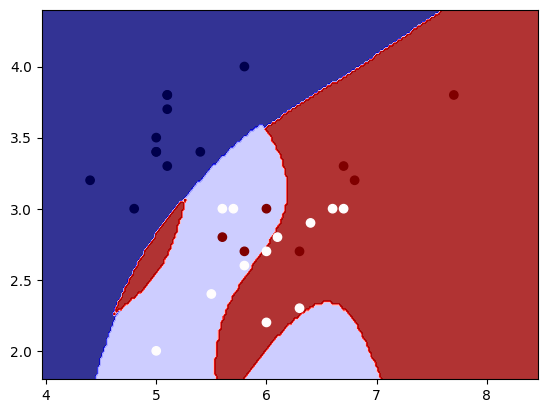

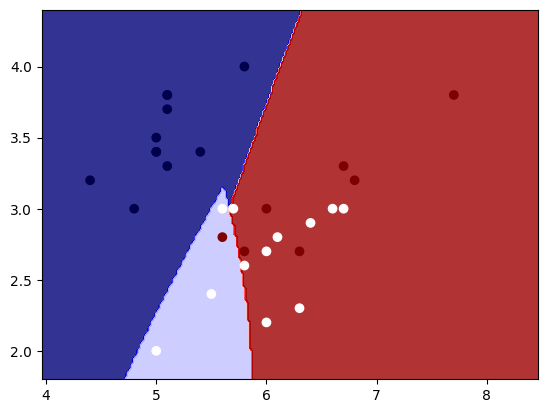

In [58]:
# Создадим объект класса SVM c линейным ядром и C=1000000
SVM_C_v1 = SVC(kernel='rbf', C=100000)
# Обучение модели
SVM_C_v1.fit(X_train, y_train);

# Создадим объект класса SVM c линейным ядром и C=0.1
SVM_C_v2 = SVC(kernel='rbf', C=0.1)
# Обучение модели
SVM_C_v2.fit(X_train, y_train);

# Выведем границы классов по модели
plot_contours(X_train.values, X_test.values, y_test.values, SVM_C_v1)
plot_contours(X_train.values, X_test.values, y_test.values, SVM_C_v2)

> # Задание

> При помощи перебора параметров найти наиболее оптимальные гиперпараметры модели и посчитать метрики. Обучать модель необходимо на всем датасете (X,y) без разделения на train/test. Для выполнения задания необходимо воспользоваться модуем GridSearchCV, ниже краткое описание.
Диапазоны параметров: ядра из множества (linear', 'poly', 'rbf'), параметр C (0.001, 0.01, 0.1, 1, 10), параметр gamma (0.01, 0.1, 0.5, 1), random state = 21. Для расчета метрики точности можно вызвать функцию `score` объекта `GridSearchCV`. Для вывода параметров наилучшей модели, можно воспользоваться функцией `best_estimator_` объекта `GridSearchCV`


### GridSearchCV

У каждого из алгоритмов есть определенный набор параметров, которые необходимо подобрать в процессе обучения модели. Но как оптимальнее всего автоматизировать этот процесс? Первое, что приходит в голову, это использовать циклы, внутри которых будем перебирать различные параметры модели. Но каждый раз описывать эти циклы довольно рутинно и неинтересно. Именно поэтому в библиотеке `Scikit-Learn` рализован инструмент перебора параметров, который называется `GridSearchCV`.
`GridSearchCV` – это очень мощный инструмент для автоматического подбора параметров для моделей машинного обучения. `GridSearchCV` находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Также есть `RandomSearchCV` - это когда мы перебираем не по полной сетке возможных комбинаций параметров, а случайным образом выбираем комбинации и обучаем модели на них. Магические буквы `CV` - это кросс-валидация, пока параметр, отвечающий за этот функционал мы просто оставим равным 3, далее в лекциях поговорим что это такое и как с этим работать.

In [59]:
# импорт нужного модуля
from sklearn.model_selection import GridSearchCV

# задаем словарь параметров для модели SVM, которые мы хотим варьироать в рамках
# работы GridSearchCV
parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 0.5, 1]
}

# создать объект класса SVC (Support Vector Classifier) c random_state=21
svc_random_state_21 = SVC(random_state=21)

# создаем объект GridSearchCV с созданной моделью и param_grid с параметрами, которые задали ранее. Параметр cv=3
grid_search = GridSearchCV(estimator=svc_random_state_21, param_grid=parameters, cv=3)

# обучаем модель (для объекта GridSearchCV вызываем метод fit для всех исходных данных)
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(random_state=21),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [60]:
# Выведите метрику точности для обученной модели
print(f"Метрика точности: {grid_search.best_score_}")

Метрика точности: 0.9933333333333333


In [61]:
# Выведите параметры наилучшей модели
print(f"Параметры наилучшей модели: {grid_search.best_params_}")

Параметры наилучшей модели: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
